In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [2]:
# Setting up registers and circuits
def init_circuit():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    return circuit, qreg_q, creg_c

# Deutsch's Algorithm

Deutsch's Algorithm determines whether a function  
$$
f : \{0,1\} \rightarrow \{0,1\}
$$
is **constant** (always outputs the same value) or **balanced** (outputs 0 for one input and 1 for the other).  
Classically, this requires two evaluations, but the quantum version can decide with just one.



In [3]:
def deutsch_algo(oracle):
    circuit, qreg_q, creg_c = init_circuit()
    circuit.x(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.barrier()

    circuit = circuit.compose(oracle)
    circuit.barrier()

    circuit.h(qreg_q[0])
    circuit.measure(qreg_q[0], 0)

    return circuit


## Implementing Unbalanced (Constant) and Balanced Functions

Constant functions can be represented by either doing nothing (always 0) or applying an X gate (always 1).

Balanced functions can be implemented in two common ways using controlled operations.

For simplicity, we will pick one example from each to demonstrate (x gate for constant, cx gate for balanced)

In [4]:
def unbalanced():
    circuit, qreg_q, creg_c = init_circuit()
    circuit.x(qreg_q[1])
    return circuit

def balanced():
    circuit, qreg_q, creg_c = init_circuit()
    circuit.cx(qreg_q[0],1)
    return circuit

## Mathematics for Constant and Balanced Functions
### Expected Outcomes

Constant functions: the result is always 0.  
Balanced functions: the result is always 1.

unbalanced: {'0': 100}
balanced: {'1': 100}


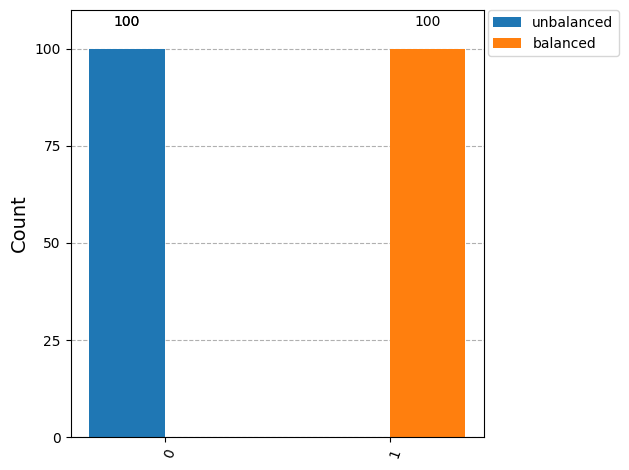

In [ ]:
results = []
for oracle in [unbalanced, balanced]:
    circuit = deutsch_algo(oracle())
    result = AerSimulator().run(circuit, shots=100).result()
    counts = result.get_counts()
    print(f"{oracle.__name__}: {counts}")
    results.append(counts)

plot_histogram(results, legend= ["unbalanced", "balanced"])

In [ ]:
# To run on real hardware uncomment:

# service = QiskitRuntimeService()

# backend = service.least_busy(simulator=False, operational=True)

# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
# isa_circuit = pm.run(circuit)

# isa_circuit.draw("mpl", idle_wires=False)